**Problem Statement** - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.


## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Find the missing values

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
df.smoker.value_counts()


no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
df.region.value_counts()


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

### Check for outliers

<Axes: >

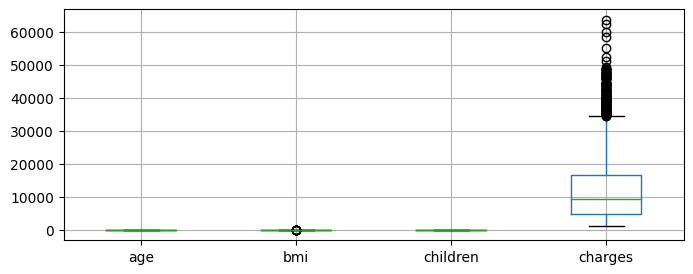

In [ ]:
plt.figure(figsize=(8,3))
df.boxplot()

<Axes: ylabel='charges'>

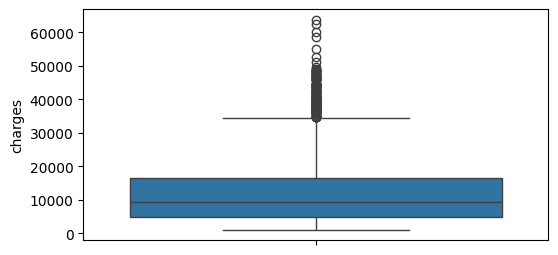

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(df['charges'])

<Axes: ylabel='bmi'>

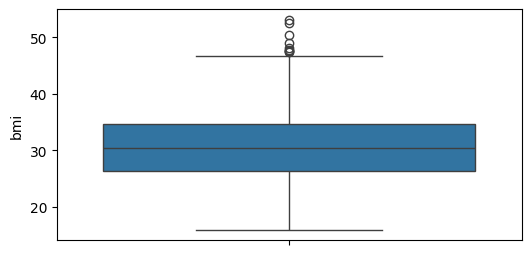

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(df['bmi'])

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]



print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Outliers : {outliers}')

Lower Bound: -13120.716174999998
Upper Bound: 34524.777625
Outliers :       age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [ ]:
outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


### Winsorization

In [ ]:
higher_outliers = df[df['charges'] > upper_bound]

higher_outliers = higher_outliers['charges'].values

higher_outliers



array([39611.7577 , 36837.467  , 37701.8768 , 38711.     , 35585.576  ,
       51194.55914, 39774.2763 , 48173.361  , 38709.176  , 37742.5757 ,
       47496.49445, 37165.1638 , 39836.519  , 43578.9394 , 47291.055  ,
       47055.5321 , 39556.4945 , 40720.55105, 36950.2567 , 36149.4835 ,
       48824.45   , 43753.33705, 37133.8982 , 34779.615  , 38511.6283 ,
       35160.13457, 47305.305  , 44260.7499 , 41097.16175, 43921.1837 ,
       36219.40545, 46151.1245 , 42856.838  , 48549.17835, 47896.79135,
       42112.2356 , 38746.3551 , 42124.5153 , 34838.873  , 35491.64   ,
       42760.5022 , 47928.03   , 48517.56315, 41919.097  , 36085.219  ,
       38126.2465 , 42303.69215, 46889.2612 , 46599.1084 , 39125.33225,
       37079.372  , 35147.52848, 48885.13561, 36197.699  , 38245.59327,
       48675.5177 , 63770.42801, 45863.205  , 39983.42595, 45702.02235,
       58571.07448, 43943.8761 , 39241.442  , 42969.8527 , 40182.246  ,
       34617.84065, 42983.4585 , 42560.4304 , 40003.33225, 45710

In [ ]:
upper_bound

34524.777625

In [ ]:
replace_dict = {}.fromkeys(higher_outliers, upper_bound)


In [ ]:
df['charges'].replace(replace_dict, inplace = True)

<Axes: ylabel='charges'>

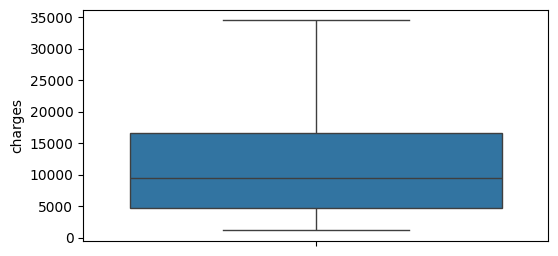

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(df['charges'])

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]



print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Outliers : {outliers}')

Lower Bound: 13.674999999999994
Upper Bound: 47.31500000000001
Outliers :       age     sex    bmi  children smoker     region       charges
116    58    male  49.06         0     no  southeast  11381.325400
286    46  female  48.07         2     no  northeast   9432.925300
401    47    male  47.52         1     no  southeast   8083.919800
543    54  female  47.41         0    yes  southeast  34524.777625
847    23    male  50.38         1     no  southeast   2438.055200
860    37  female  47.60         2    yes  southwest  34524.777625
1047   22    male  52.58         1    yes  southeast  34524.777625
1088   52    male  47.74         1     no  southeast   9748.910600
1317   18    male  53.13         0     no  southeast   1163.462700


In [ ]:
outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.325400
286,46,female,48.07,2,no,northeast,9432.925300
401,47,male,47.52,1,no,southeast,8083.919800
543,54,female,47.41,0,yes,southeast,34524.777625
847,23,male,50.38,1,no,southeast,2438.055200
860,37,female,47.60,2,yes,southwest,34524.777625
1047,22,male,52.58,1,yes,southeast,34524.777625
1088,52,male,47.74,1,no,southeast,9748.910600
1317,18,male,53.13,0,no,southeast,1163.462700


In [ ]:
higher_outliers = df[df['bmi'] > upper_bound]

higher_outliers = higher_outliers['bmi'].values

higher_outliers

array([49.06, 48.07, 47.52, 47.41, 50.38, 47.6 , 52.58, 47.74, 53.13])

In [ ]:
lower_outliers = df[df['bmi'] < lower_bound]

lower_outliers = lower_outliers['bmi'].values

lower_outliers

array([], dtype=float64)

In [ ]:
upper_bound

47.31500000000001

In [ ]:
replace_dict = {}.fromkeys(higher_outliers, upper_bound)


In [ ]:
df['bmi'].replace(replace_dict, inplace = True)

<Axes: ylabel='bmi'>

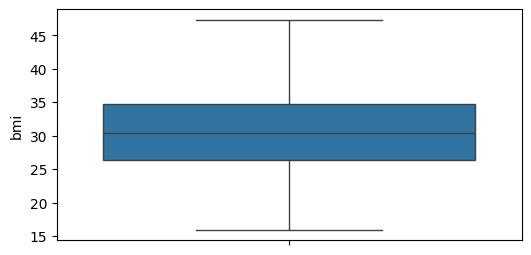

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(df['bmi'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


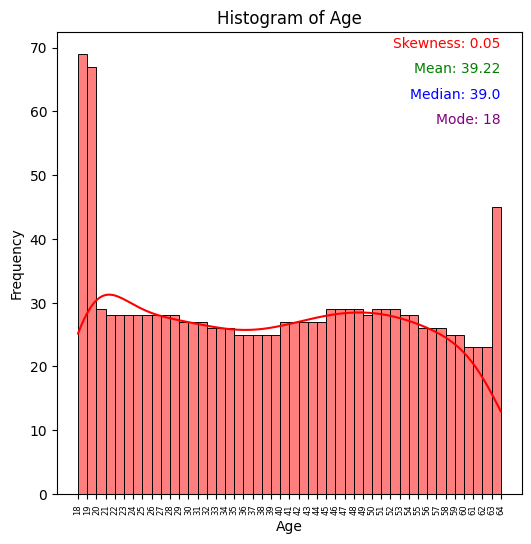

In [ ]:

from scipy.stats import skew

age_data = df['age']
age_data = age_data.astype(int)

age_skewness = skew(age_data)
age_mean = age_data.mean()
age_median = age_data.median()
age_mode = age_data.mode()[0]


plt.figure(figsize=(6,6))
sns.histplot(age_data, kde=True, bins=range(min(age_data), max(age_data) + 1, 1),color='red')
plt.text(64, 70, f"Skewness: {round(age_skewness, 2)}", ha='right', fontsize=10, color='red')
plt.text(64, 66, f"Mean: {round(age_mean, 2)}", ha='right', fontsize=10, color='green')
plt.text(64, 62, f"Median: {round(age_median, 2)}", ha='right', fontsize=10, color='blue')
plt.text(64, 58, f"Mode: {round(age_mode, 2)}", ha='right', fontsize=10, color='purple')








plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(min(age_data), max(age_data) + 1, 1),rotation=90,fontsize=6)

plt.show()





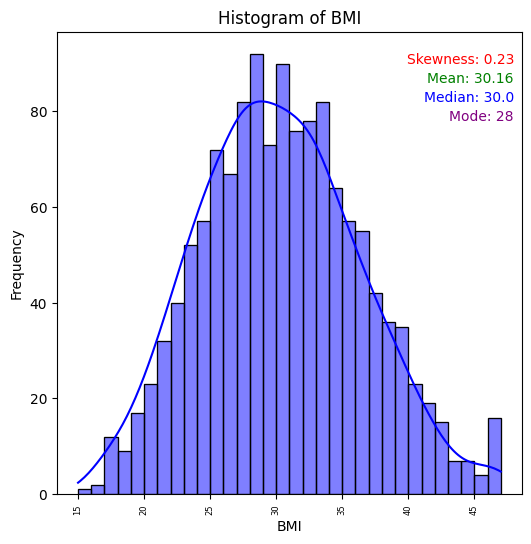

In [ ]:
bmi_data = df['bmi']

# Convert bmi_data to integer type
bmi_data = bmi_data.astype(int)

bmi_skewness = skew(bmi_data)
bmi_mean = bmi_data.mean()
bmi_median = bmi_data.median()
bmi_mode = bmi_data.mode()[0]

plt.figure(figsize=(6, 6))
sns.histplot(bmi_data, kde=True, bins=range(int(min(bmi_data)), int(max(bmi_data)) + 1, 1), color='blue')
plt.text(48, 90, f"Skewness: {round(bmi_skewness, 2)}", ha='right', fontsize=10, color='red')
plt.text(48, 86, f"Mean: {round(bmi_mean, 2)}", ha='right', fontsize=10, color='green')
plt.text(48, 82, f"Median: {round(bmi_median, 2)}", ha='right', fontsize=10, color='blue')
plt.text(48, 78, f"Mode: {round(bmi_mode, 2)}", ha='right', fontsize=10, color='purple')

plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=6)
plt.show()

<Axes: xlabel='age', ylabel='count'>

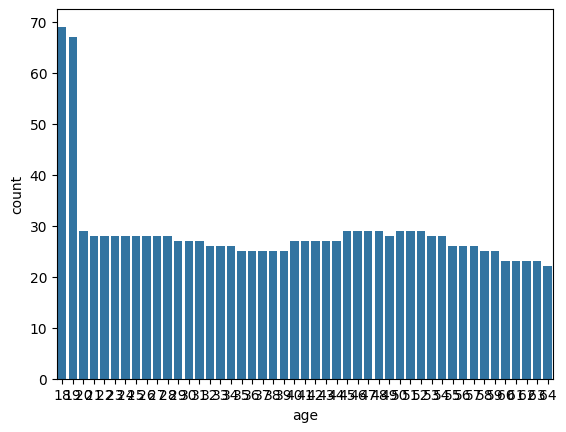

In [ ]:
sns.countplot(x='age',data=df)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<ipython-input-39-6a8ab6f0a1f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set1')


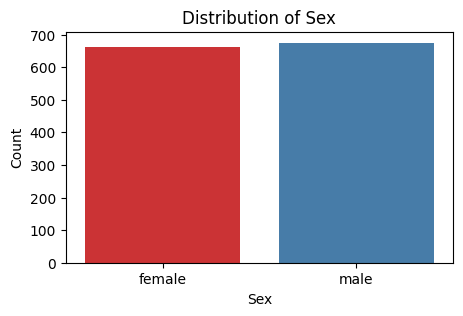

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', data=df, palette='Set1')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

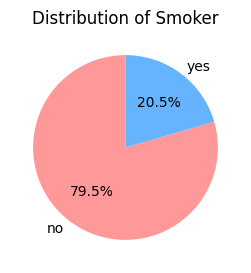

In [ ]:
smoker_counts = df['smoker'].value_counts()

# Set custom colors
colors = ['#ff9999', '#66b3ff']

# Create pie plot
plt.figure(figsize=(6, 3))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Smoker')
plt.show()

In [ ]:
smoker_counts

no     1063
yes     274
Name: smoker, dtype: int64

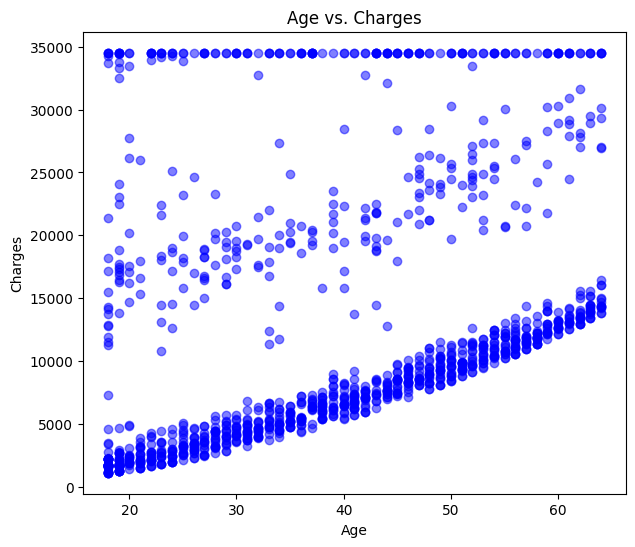

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5, color='blue')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()

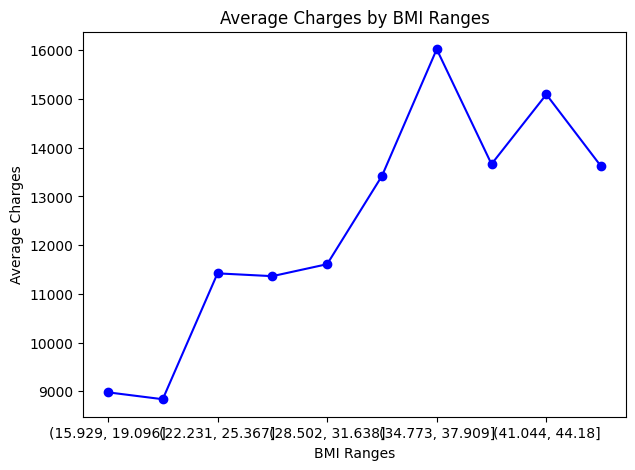

In [ ]:
bmi_groups = pd.cut(df['bmi'], bins=10)  # Adjust the number of bins as needed
avg_charges = df.groupby(bmi_groups)['charges'].mean()

# Plot line plot
plt.figure(figsize=(7, 5))
avg_charges.plot(kind='line', marker='o', color='blue')

# Add labels and title
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')


plt.show()

In [ ]:
df['age'].corr(df['charges'])



0.3124228943730167

In [ ]:
df['bmi'].corr(df['charges'])



0.16121962665448594

<ipython-input-47-4db014ea7b41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


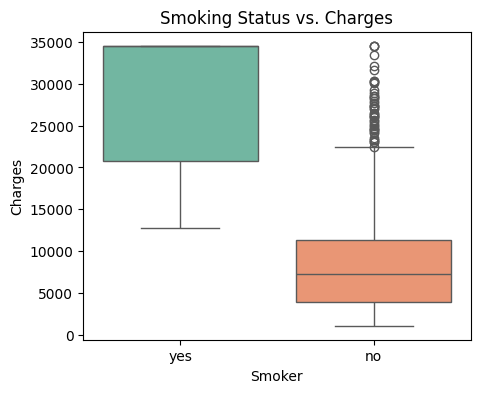

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Smoking Status vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [ ]:
smoker_yes_charges = df[df['smoker'] == 'yes']['charges']
smoker_no_charges = df[df['smoker'] == 'no']['charges']

# Calculate Q1, Q3, and IQR for 'yes' category
Q1_yes = smoker_yes_charges.quantile(0.25)
Q3_yes = smoker_yes_charges.quantile(0.75)
IQR_yes = Q3_yes - Q1_yes

# Calculate Q1, Q3, and IQR for 'no' category
Q1_no = smoker_no_charges.quantile(0.25)
Q3_no = smoker_no_charges.quantile(0.75)
IQR_no = Q3_no - Q1_no

# Calculate median for 'yes' category
median_yes = smoker_yes_charges.median()

# Calculate median for 'no' category
median_no = smoker_no_charges.median()

# Identify outliers for 'yes' category
outliers_yes = smoker_yes_charges[(smoker_yes_charges < (Q1_yes - 1.5 * IQR_yes)) | (smoker_yes_charges > (Q3_yes + 1.5 * IQR_yes))]

# Identify outliers for 'no' category
outliers_no = smoker_no_charges[(smoker_no_charges < (Q1_no - 1.5 * IQR_no)) | (smoker_no_charges > (Q3_no + 1.5 * IQR_no))]

print("For 'yes' category:")
print("Q1:", Q1_yes)
print("Q3:", Q3_yes)
print("IQR:", IQR_yes)
print("Median:", median_yes)
print("Outliers:", outliers_yes)

print("\nFor 'no' category:")
print("Q1:", Q1_no)
print("Q3:", Q3_no)
print("IQR:", IQR_no)
print("Median:", median_no)
print("Outliers:", outliers_no)







For 'yes' category:
Q1: 20826.2442125
Q3: 34524.777625
IQR: 13698.5334125
Median: 34456.348450000005
Outliers: Series([], Name: charges, dtype: float64)

For 'no' category:
Q1: 3988.8835
Q3: 11363.0191
IQR: 7374.1356
Median: 7345.7266
Outliers: 9       28923.136920
62      30166.618170
115     30259.995560
138     27322.733860
140     27375.904780
219     25081.767840
227     24227.337240
242     34524.777625
245     24476.478510
289     25992.821040
321     24671.663340
355     24603.048370
379     27000.984730
387     30284.642940
430     23082.955330
443     28287.897660
468     23288.928400
491     24513.091260
516     27724.288750
520     25656.575260
526     24059.680190
539     27346.042070
573     31620.001060
599     33471.971890
637     24915.046260
658     26392.260290
688     26236.579970
696     29186.482360
770     27941.287580
806     28476.734990
876     26140.360300
925     25333.332840
936     32108.662820
959     28468.919010
964     26467.097370
980     25517.113630

In [ ]:
Q1_region = df.groupby('region')['charges'].quantile(0.25)
Q3_region = df.groupby('region')['charges'].quantile(0.75)
IQR_region = Q3_region - Q1_region

# Calculate median for 'region' category
median_region = df.groupby('region')['charges'].median()

# Identify outliers for 'region' category
outliers_region = df.groupby('region')['charges'].apply(lambda x: x[(x < (Q1_region.loc[x.name] - 1.5 * IQR_region.loc[x.name])) | (x > (Q3_region.loc[x.name] + 1.5 * IQR_region.loc[x.name]))])

print("For each region:")
for region in df['region'].unique():
    print(f"\nRegion: {region}")
    print("Q1:", Q1_region.get(region, 'N/A'))
    print("Q3:", Q3_region.get(region, 'N/A'))
    print("IQR:", IQR_region.get(region, 'N/A'))
    print("Median:", median_region.get(region, 'N/A'))
    print("Outliers:", outliers_region.get(region, pd.DataFrame()))

For each region:

Region: southwest
Q1: 4751.07
Q3: 13462.52
IQR: 8711.45
Median: 8798.593
Outliers: 19      34524.777625
29      34524.777625
30      34524.777625
34      34524.777625
39      34524.777625
84      34524.777625
94      34524.777625
175     34524.777625
223     34524.777625
242     34524.777625
251     34524.777625
271     34524.777625
314     34524.777625
322     34524.777625
328     34524.777625
373     34524.777625
441     34524.777625
500     34524.777625
609     34524.777625
621     34524.777625
682     34524.777625
739     34524.777625
770     27941.287580
860     34524.777625
953     34524.777625
1001    34472.841000
1049    34524.777625
1120    34166.273000
1146    34524.777625
1206    34524.777625
1207    34524.777625
1218    34524.777625
1284    34524.777625
1288    34524.777625
1291    34524.777625
1303    34524.777625
1308    33900.653000
1313    34524.777625
Name: charges, dtype: float64

Region: southeast
Q1: 4440.886200000001
Q3: 19526.2869
IQR: 15085.4006

In [ ]:
outliers_no.count()

46

<ipython-input-51-8e715620310d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set3')


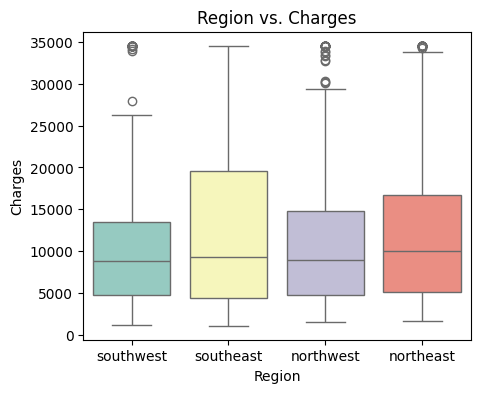

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Region vs. Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


### Encoding

##### One Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

#object of OneHotEncoder
oh = OneHotEncoder()



In [ ]:
ct = ColumnTransformect = ColumnTransformer(transformers = [("ohe", oh, ["sex", "smoker","region"] )], remainder = "passthrough")

In [ ]:
df= ct.fit_transform(df)


In [ ]:
df

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [ ]:
ct.get_feature_names_out()

array(['ohe__sex_female', 'ohe__sex_male', 'ohe__smoker_no',
       'ohe__smoker_yes', 'ohe__region_northeast',
       'ohe__region_northwest', 'ohe__region_southeast',
       'ohe__region_southwest', 'remainder__age', 'remainder__bmi',
       'remainder__children', 'remainder__charges'], dtype=object)

In [ ]:
col_name = [each_col.split("__")[1] for each_col in ct.get_feature_names_out()]

In [ ]:
col_name

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age',
 'bmi',
 'children',
 'charges']

In [ ]:
df = pd.DataFrame(df, columns = col_name )

In [ ]:
df

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [ ]:
df.dtypes

sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
age                 float64
bmi                 float64
children            float64
charges             float64
dtype: object

### Split independent and Dependent Variables

In [ ]:
#Independent Varible / Inputs / Features
X = df.drop("charges", axis = 1)

In [ ]:

X

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [ ]:
y = df["charges"]

### Split data in Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [ ]:
X_train

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
762,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,27.0,26.03,0.0
1078,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,33.66,3.0
178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,46.0,28.90,2.0
287,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,63.0,26.22,0.0
1289,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,38.0,19.95,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,51.0,34.96,2.0
1130,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,27.0,45.90,2.0
1294,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,20.0,22.00,1.0
860,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,38.0,28.00,3.0


In [ ]:
X_test.shape

(335, 11)

In [ ]:
y_train

762      3070.808700
1078    15161.534400
178      8823.279000
287     14256.192800
1289     7133.902500
            ...     
1095    34524.777625
1130     3693.428000
1294     1964.780000
860      7151.092000
1126     5836.520400
Name: charges, Length: 1002, dtype: float64

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.96469469,  0.96469469,  0.50716324, ..., -0.8629477 ,
        -0.76624811, -0.91222776],
       [-0.96469469,  0.96469469,  0.50716324, ...,  1.71517467,
         0.51403645,  1.59660724],
       [ 1.0365974 , -1.0365974 ,  0.50716324, ...,  0.49772799,
        -0.28467319,  0.7603289 ],
       ...,
       [-0.96469469,  0.96469469,  0.50716324, ..., -1.36424928,
        -1.44246656, -0.07594943],
       [ 1.0365974 , -1.0365974 ,  0.50716324, ..., -0.07518809,
        -0.43568971,  1.59660724],
       [ 1.0365974 , -1.0365974 ,  0.50716324, ..., -0.29003162,
         0.88318796,  0.7603289 ]])

## Building  ML Models

###### Training, Testing and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
models={'knn_model' : KNeighborsRegressor(),
        'lr_model':LinearRegression(),
        'svr_model':SVR(),
        'decision_tree':DecisionTreeRegressor(),
        'random_forests':RandomForestRegressor()}

mae_scores={}
for model_name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mae=mean_absolute_error(y_test,y_pred)
  mae_scores[model_name]=mae
  print(f'{model_name} MAE:{mae}')


knn_model MAE:2939.396444647761
lr_model MAE:3119.453569954184
svr_model MAE:7795.35761043376
decision_tree MAE:2367.4490151611985
random_forests MAE:2318.3459374870185


#####Plot of all the algorithms applied along with the MAE scores achieved

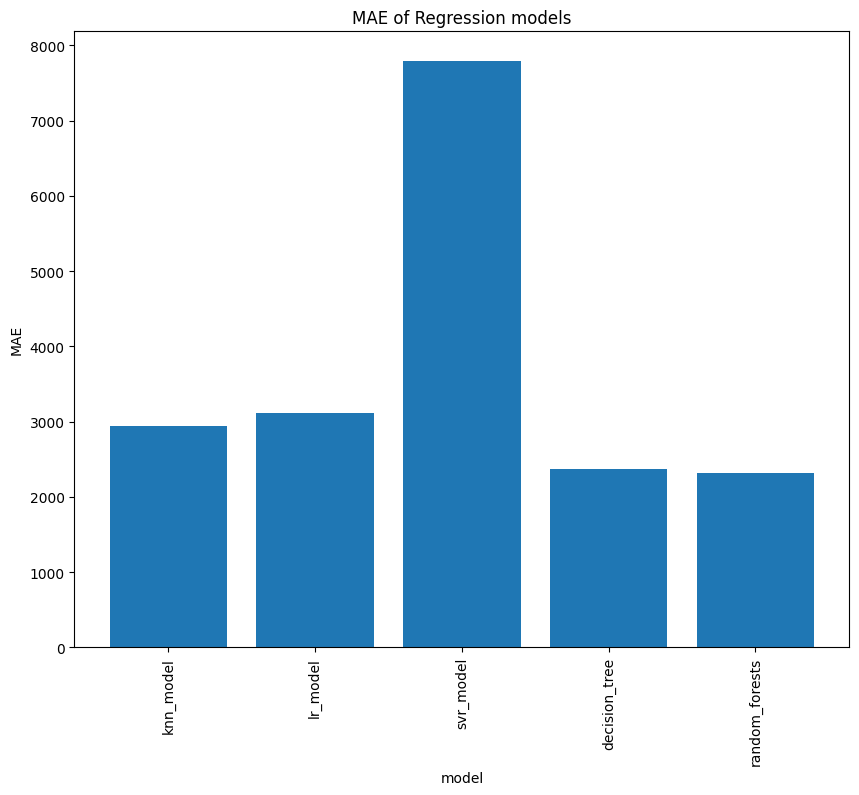

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(mae_scores.keys(),mae_scores.values())
plt.xlabel('model')
plt.ylabel('MAE')
plt.xticks(rotation=90)
plt.title('MAE of Regression models')
plt.show()

## Observations:

In this analysis, we aimed to predict medical costs billed by health insurance on individuals using machine learning techniques. The Random Forest algorithm emerged as the top-performing model, achieving a Mean Absolute Error (MAE) of approximately $2779.80.

Our findings demonstrate the effectiveness of Random Forest in accurately predicting medical costs based on individual features such as age, sex, BMI, number of children, smoking status, and region. The low MAE suggests that, on average, the predictions made by the Random Forest model are close to the actual medical costs, indicating its potential utility in healthcare cost prediction tasks.

The findings of this study have significant implications for healthcare cost management and decision-making
. The strengths of the Random Forest algorithm, including its ability to handle complex relationships and outliers, contributed to its superior performance in this analysis.




## Save the model


In [ ]:
import joblib

model.scaler = sc

#1. Model to be saved
#2.Filename
joblib.dump(model, f"medical_cost_prediction_model.pkl")

['medical_cost_prediction_model.pkl']

## Real-Time Prediction

In [ ]:


# Define the function for real-time prediction
def predict_medical_cost(new_data):
    # Define the feature order
    feature_order = ['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age', 'bmi', 'children']

    try:
        # Reorder columns to match feature order
        new_data = new_data[feature_order]

        # Preprocess new data
        new_data_scaled = model.scaler.transform(new_data)

        # Make predictions
        predictions = model.predict(new_data_scaled)

        return predictions
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Example usage
new_data = pd.DataFrame({
    'age': [35],
    'bmi': [30],
    'children': [1],
    'sex_male': [1],
    'smoker_yes': [0],
    'sex_female':[0],
    'smoker_no':[1],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0],
    'region_northeast':[1]
})

predicted_cost = predict_medical_cost(new_data)
print("Predicted medical cost:", predicted_cost)

Predicted medical cost: [4992.161245]
